Started Nov 27, 2016
# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

#### Reviewer3 suggests to look: 
https://github.com/rasbt/python-machine-learning-book  

http://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


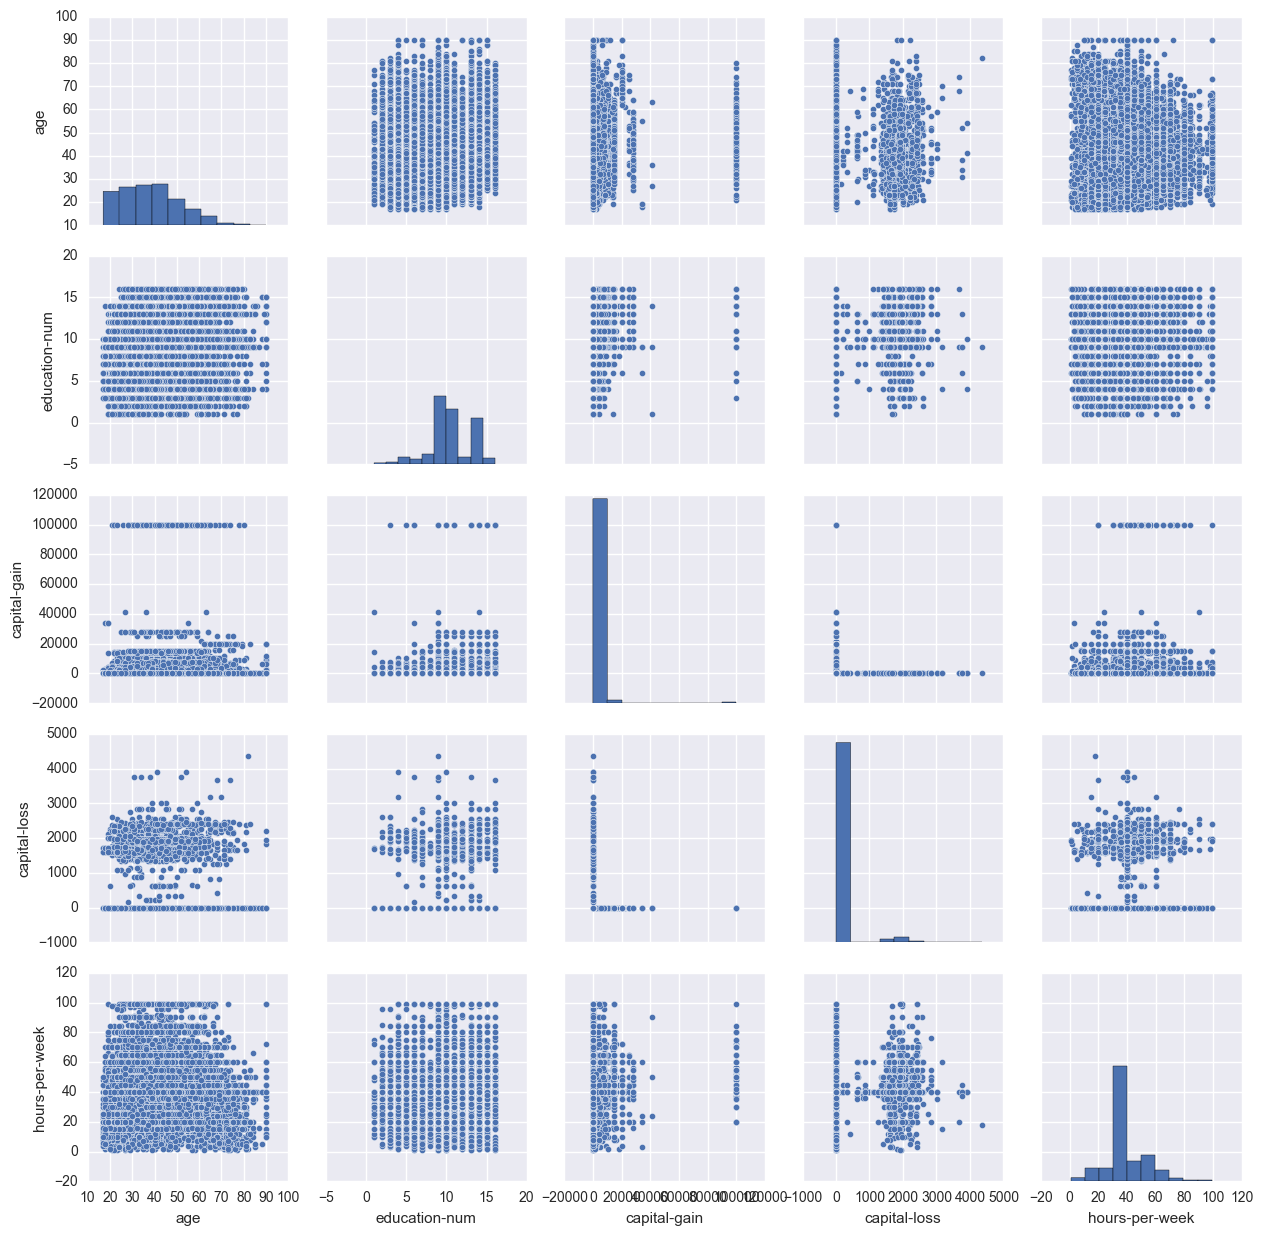

In [2]:
import seaborn as sns
sns.pairplot(data=data, dropna=True)

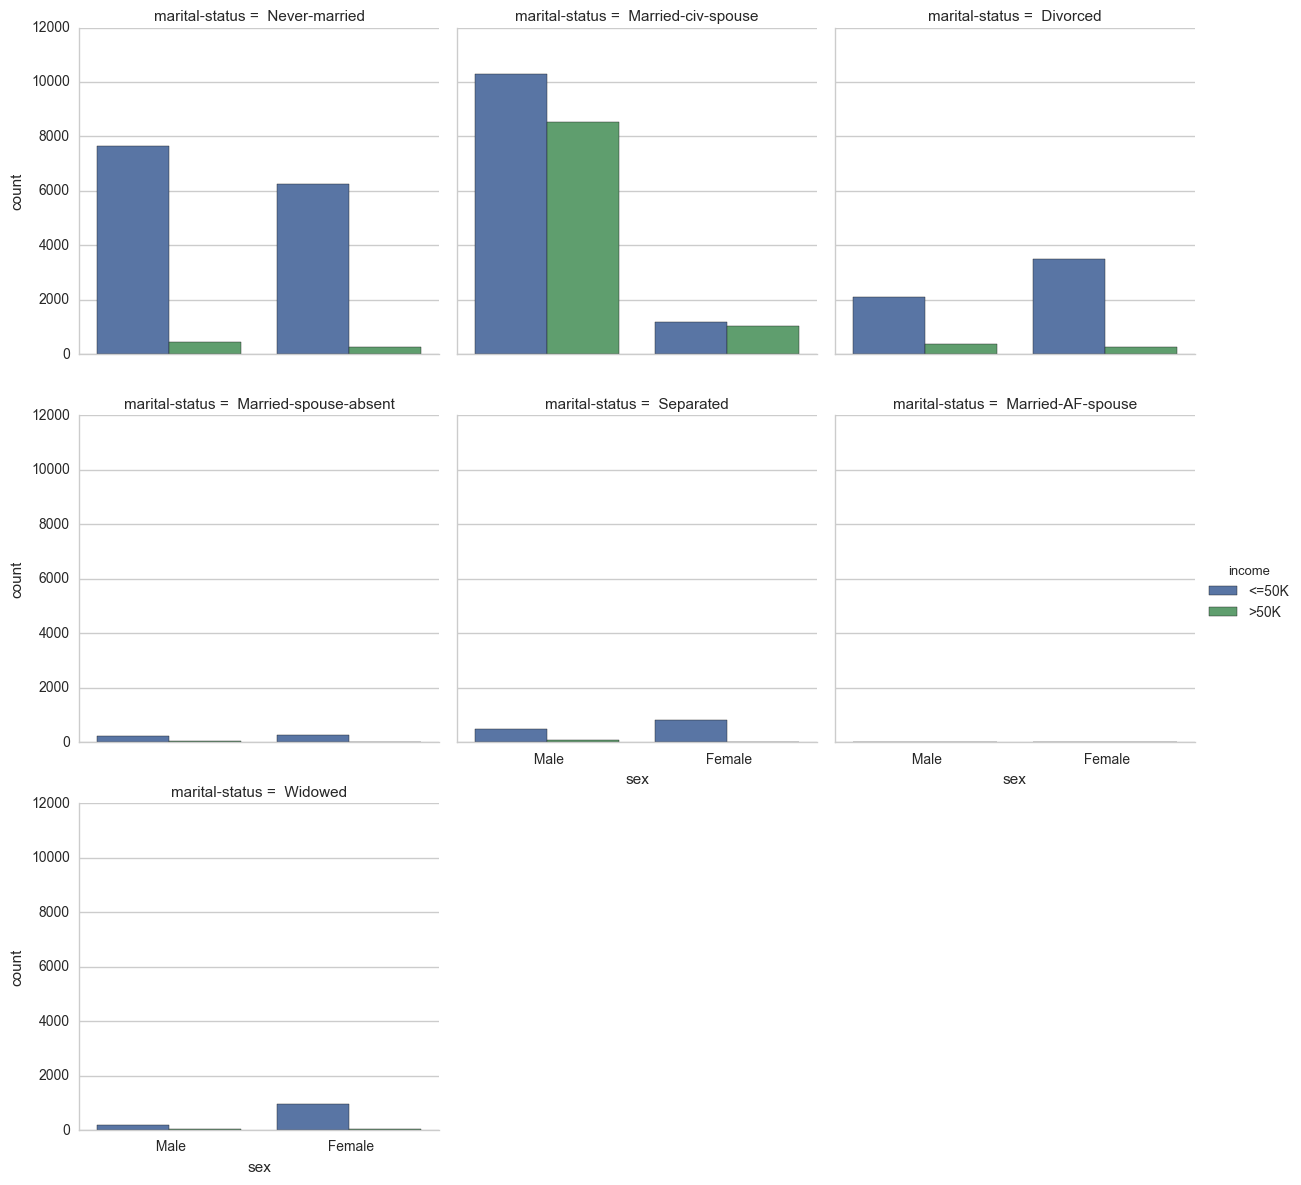

In [4]:
#Reviewer #1 suggested another EDA. 
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.factorplot("sex", col="marital-status", data=data, hue='income', kind="count", col_wrap=3)

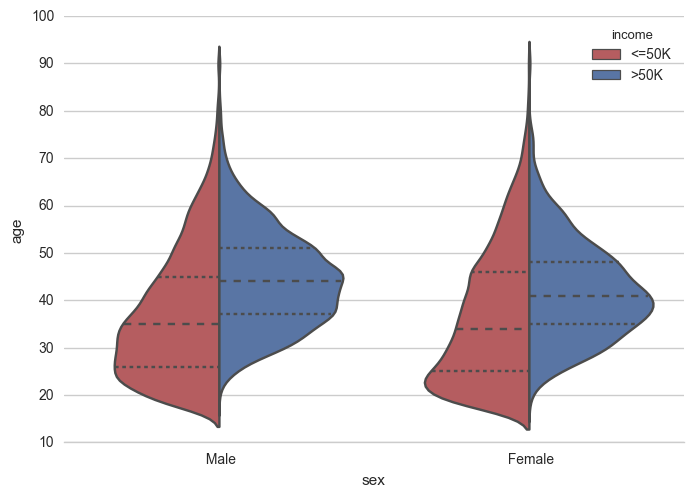

In [70]:
#Reviewer3 suggests violin plot
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="sex", y="age", hue="income", data=data, split=True, 
               inner="quart", palette={"<=50K": "r", ">50K": "b"}
              )
sns.despine(left=True)


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [5]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = sum(data.income=='>50K')

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = sum(data.income=='<=50K')

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = float(n_greater_50k)/n_records*100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [81]:
# Reviewer3 suggests- look at first few non-numeric columns
print data.columns
print "\n"
print data.columns[:5]
print "\n"
print data.columns.dtype
print "\n"
print data.dtypes
print "\n"


Index([u'age', u'workclass', u'education_level', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'income'],
      dtype='object')


Index([u'age', u'workclass', u'education_level', u'education-num',
       u'marital-status'],
      dtype='object')


object


age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object




In [71]:
# Reviewer3 suggests- look at first few non-numeric columns
for col in data.columns[:5]:
    if data[col].dtype == 'O':
        display(data[col].value_counts())

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

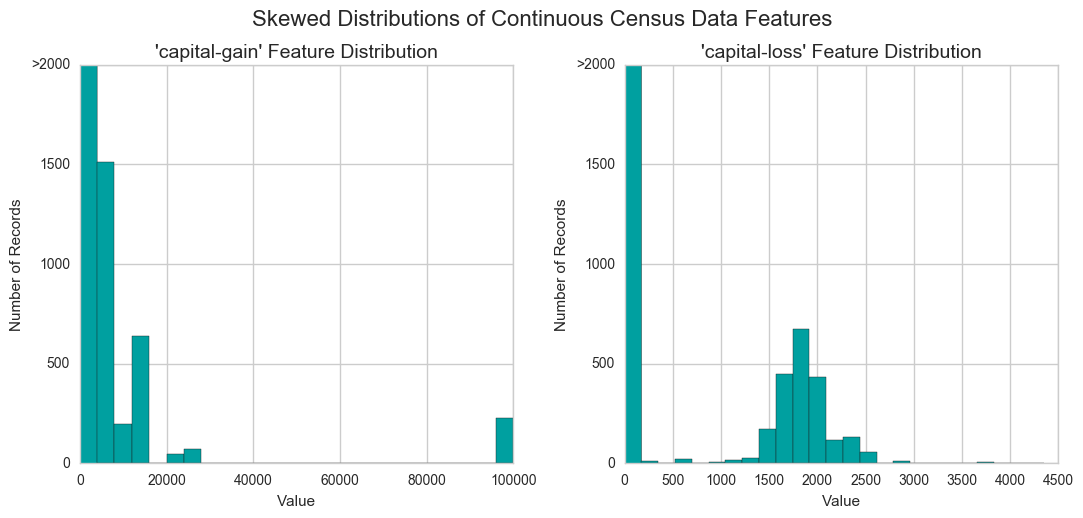

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

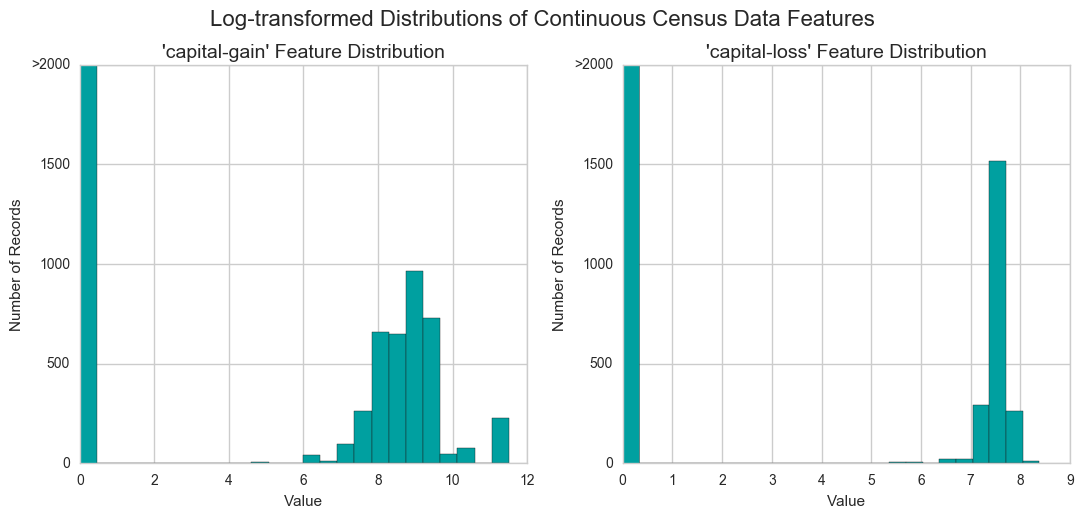

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [9]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = pd.get_dummies(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [10]:
income_raw.head(2)

0    <=50K
1    <=50K
Name: income, dtype: object

In [60]:
#Reviewer #1 suggested

income_reviewer1 = income_raw.apply(lambda x: 1 if x == '>50K' else 0)
income_reviewer1.head(2)

#Reviewer2 suggested Label encoder 
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
    

0    0
1    0
Name: income, dtype: int64

In [12]:
#income = pd.get_dummies(income_raw)

income.head(2)


,<=50K,>50K
0,1.0,0.0
1,1.0,0.0


In [13]:
features_raw.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States


In [14]:
features.head(2)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.8,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.8,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
import pandas as pd
concat_result = pd.concat([features, income], axis=1, join='inner') #, axis=1, join='inner'
concat_result.head(2)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,<=50K,>50K
0,0.301370,0.8,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.452055,0.8,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
#sns.pairplot(data=concat_result, dropna=True)

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [17]:
# Import train_test_split
from sklearn.model_selection import train_test_split #cross_validation

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


In [18]:
#print X_train.head(1)
#print X_test.head(1)
print "y_train.head(1)::::::\n",y_train.head(1)
#print y_test.head(1)

print "y_train['>50K'].head(1)::::::\n",y_train['>50K'].head(1)
y_train_50Kp=y_train['>50K']
y_test_50Kp=y_test['>50K']

print "y_train_50Kp::::::\n",y_train_50Kp.head(1)
print "y_test_50Kp::::::\n",y_test_50Kp.head(1)

y_train.head(1)::::::
       <=50K  >50K
13181    1.0   0.0
y_train['>50K'].head(1)::::::
13181    0.0
Name: >50K, dtype: float64
y_train_50Kp::::::
13181    0.0
Name: >50K, dtype: float64
y_test_50Kp::::::
41387    0.0
Name: >50K, dtype: float64


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *UdacityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would is appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *UdacityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *UdacityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [61]:
##here the model always predicts an individual made more than $50,000*

n_records = len(data)# Total number of records
#n_greater_50k = sum(data.income=='>50K')# Number of records where individual's income is more than $50,000
#n_at_most_50k = sum(data.income=='<=50K')# Number of records where individual's income is at most $50,000

# TODO: Calculate accuracy
#Reviewer2 pointed 
accuracy = float(n_greater_50k)/n_records #accuracy=# of items in a class labeled correctly/all item in that class
print "Accuracy:", accuracy

# TODO: Calculate F-score using the formula above for beta = 0.5

precision= float(n_greater_50k)/(n_greater_50k+(n_records-n_greater_50k)) #True Positive / (True Positive + False Positive). 
#Out of all the items labeled as positive, how many truly belong to the positive class.
print "precision:",precision
recall=float(n_greater_50k)/(n_greater_50k+0) # True Positive / (True Positive + False Negative)
print "recall:",recall
#True Positive / (True Positive + False Negative). 
#Out of all the items that are truly positive, how many were correctly classified as positive. 
#Or simply, how many positive items were 'recalled' from the dataset.

beta=0.5
fscore = (1+beta**2)*(precision*recall)/(((beta**2)*precision)+recall)
print "F-score:", fscore

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Accuracy: 0.247843969749
precision: 0.247843969749
recall: 1.0
F-score: 0.291729135432
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Answer 1

Accuracy: 0.247843969749 #reviewer2 pointed wrong, fixed it.  
F-score: 0.291729135432

#Reviewer 1 suggested dummyclassifier
http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
    

###  Supverised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

**Answer: **

Reference:
http://www.cs.cmu.edu/~aarti/Class/10701/MLAlgo_Comparisons.pdf


### 1. Gaussian Naive Bayes (GaussianNB)
Ref: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html  

- *Describe one real-world application in industry where the model can be applied.*  
A: Classify whether email is from Sara or Chris in Udacity course.  
- *What are the strengths of the model; when does it perform well?*  
A: Low variance. #Reviewer1 added: simplicity or its common use as a baseline model.
- *What are the weaknesses of the model; when does it perform poorly?*  
A: Can be naive because it doesn't capture order of words or length of the sentense.   
- *What makes this model a good candidate for the problem, given what you know about the data?*  
A: This model seems to be naive to use anywhere.   


### 2.Decision Trees
Ref:http://scikit-learn.org/stable/modules/tree.html  

- *Describe one real-world application in industry where the model can be applied.*   
A: Handwritten Digit Recognition  
- *What are the strengths of the model; when does it perform well?*  
A:Easy to use/grow the tree, easy to use graphics to interprete/visualize easily compared to SVM. 
Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values. 
The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. 
- *What are the weaknesses of the model; when does it perform poorly?*  
A: Prone to overfit when there are many features. Weak learner(high bias) when depth is shallow. 
Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit. Performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand is critical to give your tree a better chance of finding features that are discriminative.
- *What makes this model a good candidate for the problem, given what you know about the data?*  
A:When the dataset has both numerical and categorical data. This doesn't requre to transpose categorical data to numerical. 



### 3. Support Vector Machines (SVM)
Ref:http://scikit-learn.org/stable/modules/svm.html  

- *Describe one real-world application in industry where the model can be applied.*  
A: Housing price prediction where there is a lot of samples with many dimensions. 
- *What are the strengths of the model; when does it perform well?*  
A:
    - Non-linear classification is possible with kernel functions.
    - Effective in high dimensional spaces.
    - Still effective in cases where number of dimensions is greater than the number of samples.
    - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- *What are the weaknesses of the model; when does it perform poorly?*  
A: Run time and storage requirements increase rapidly with the number of training vectors. The core of an SVM is a quadratic programming problem (QP), separating support vectors from the rest of the training data. 
If the number of features is much greater than the number of samples, the method is likely to give poor performances.
SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation 
- *What makes this model a good candidate for the problem, given what you know about the data?*  
A: Capability of Non-linear classification with high dimensional spaces like this income prediction with many dimension. 



#### Reviewer1 added:

There are [several issues](https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms) to consider in choosing [the best machine learning algorithm](http://sebastianraschka.com/faq/docs/best-ml-algo.html) for your problem, and it's not always easy to know which model to use — [with model selection](http://sebastianraschka.com/faq/docs/model-selection-in-datascience.html) it's often a good idea to try out simpler methods like Logistic Regression as a benchmark, and then move on to [other approaches](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) such as SVM, Decision Trees, and Ensemble methods.

Further reading:
You can also check out the udacity blog for more about [the general applications of machine learning models](http://blog.udacity.com/2016/06/machine-learning-everywhere-netflix-personalized-medicine-fraud-prevention.html), and this guide from [microsoft azure](https://docs.microsoft.com/en-us/azure/machine-learning/machine-learning-algorithm-choice) on choosing an algorithm.

#### Reviewer2 added:

##### Gaussian Naive Bayes:

- Correct widely used in spam detection as this is great for word processing.  
- As a limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of features which are completely independent. As it does desire independent features, however this really isn't too big of an issue in practice.  
- Also nice idea to use it here, as it does have a fast compute time.  

##### Decision Tree:

- Correct Very fast!!!
- With your comment of "easy to use graphics to interprete/visualize" Can look at [export_graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)  
- We can definitely see here that our Decision Tree has an overfitting issue here and this is typical with Decision Trees and Random Forests.  
-  Another great thing that Decision Tree and tree methods in sklearn gives us is a feature importance. Which we use later on.

##### Support Vector Machine:

- Good! Typically much slower, but the kernel trick makes it very awesome to find non-linearity in the data.  
-  Excellent catch with "Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient." They are memory efficient, as they only have to remember the support vectors.  
-  Also note here the SVM output parameter are not really interpretable.  
- Correct with "SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation". We can use *probability = True* to calculate probabilities, however very slow as it used five fold CV  


In [27]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

import sys
from time import time
from sklearn.metrics import accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    print "start:", start
    print "input learner:",learner
    print "X_train[:sample_size].shape:",X_train[:sample_size].shape
    print "y_train[:sample_size].shape:",y_train[:sample_size].shape
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    print "fit learner:",learner
    print "training end-start:",end-start
    
    # TODO: Calculate the training time
    results['train_time'] = round(end-start, 3)
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300]) #Reviewer1 : TO FIX: predict only first 300 pts
    end = time() # Get end time
    print "prediction end-start:",end-start
    
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = round(end-start, 3)
    
    print "results['pred_time'] :",results['pred_time'] 
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(predictions_train, y_train[:300])#Reviewer1 : TO FIX: predict only first 300 pts

        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(predictions_test, y_test)

    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5) #average='macro','micro', weighted, None)

        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5) #average='macro','micro', weighted, None)

    print "SUCCCESS"   
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results



### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Dependent on which algorithms you chose, the following implementation may take some time to run!

start: 1480998240.24
input learner: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
X_train[:sample_size].shape: (361, 103)
y_train[:sample_size].shape: (361,)
fit learner: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
training end-start: 0.0173139572144
prediction end-start: 0.271039962769
results['pred_time'] : 0.271
SUCCCESS
SVC trained on 361 samples.
start: 1480998240.54
input learner: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
X_train[:sample_size].shape: (3617

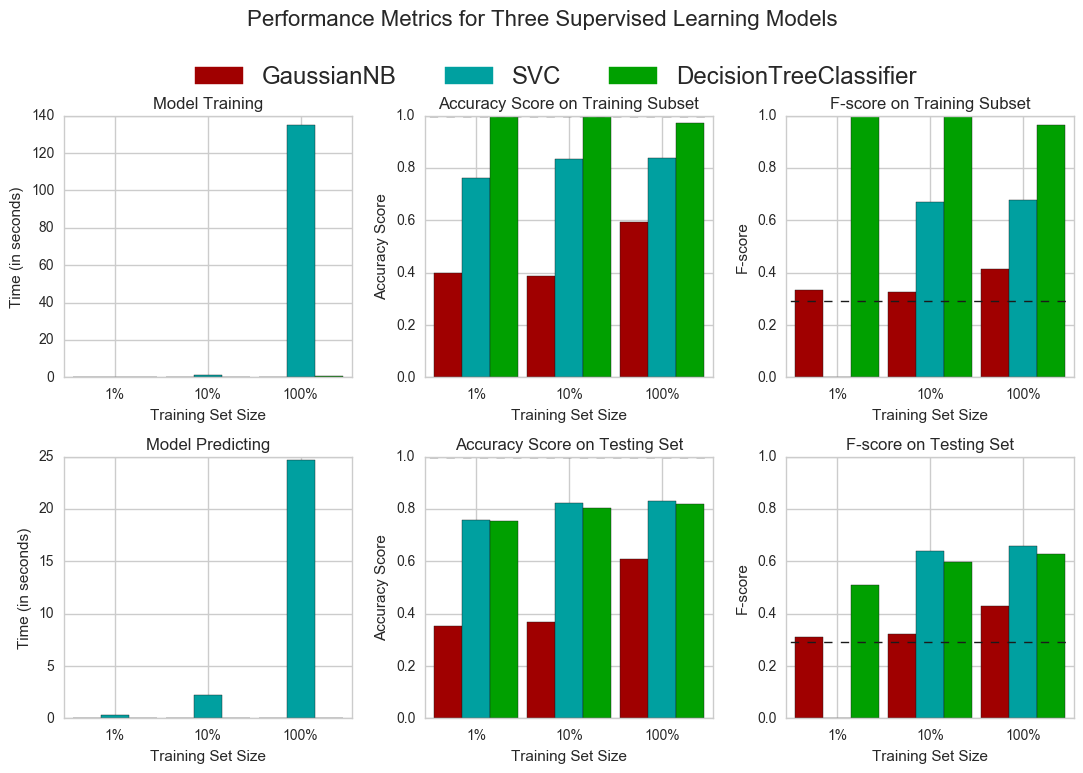

'\n'

In [30]:
# TODO: Import the three supervised learning models from sklearn

'''
Gaussian Naive Bayes (GaussianNB)
Decision Trees
Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
K-Nearest Neighbors (KNeighbors)
Stochastic Gradient Descent Classifier (SGDC)
Support Vector Machines (SVM)
Logistic Regression
'''
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

#Reviewer1: Required: set a random state in order to make results 
#reproducible by others, make sure to set random states for any classifiers
#where they can be specified.===> so I added random_state=42


# TODO: Initialize the three models
clf_A = svm.SVC(random_state=42) #Reviewer1 suggested to set a random state. 
#Reviewer#2 mentioned "As NB doesn't need a random state, as this model gives the same results each time."
clf_B = tree.DecisionTreeClassifier(random_state=42) ##Reviewer1 suggested to set a random state
clf_C = GaussianNB() ##Reviewer1 suggested to set a random state HOWEVER no option for this GaussianNB to set random state

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(X_train)*0.01)
samples_10 = int(len(X_train)*0.1)
samples_100 = len(X_train)

##DEBUG train_predict
#results=train_predict(clf_A, samples_1, X_train, y_train_50Kp, X_test, y_test_50Kp)
#vs.evaluate(results, accuracy, fscore)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    #print "clf:",clf
    #print "clf_name:",clf_name
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):#
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train_50Kp, X_test, y_test_50Kp)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)
'''
'''

In [31]:
print results

{'GaussianNB': {0: {'pred_time': 0.033, 'f_test': 0.31013434666826251, 'train_time': 0.004, 'acc_train': 0.40000000000000002, 'acc_test': 0.35179657269209508, 'f_train': 0.33333333333333331}, 1: {'pred_time': 0.031, 'f_test': 0.32079083540214759, 'train_time': 0.018, 'acc_train': 0.38666666666666666, 'acc_test': 0.3673852957435047, 'f_train': 0.3262867647058823}, 2: {'pred_time': 0.034, 'f_test': 0.42811288507232487, 'train_time': 0.147, 'acc_train': 0.59333333333333338, 'acc_test': 0.60829187396351581, 'f_train': 0.41249999999999998}}, 'SVC': {0: {'pred_time': 0.271, 'f_test': 0.0, 'train_time': 0.017, 'acc_train': 0.76000000000000001, 'acc_test': 0.75621890547263682, 'f_train': 0.0}, 1: {'pred_time': 2.256, 'f_test': 0.64084596763918966, 'train_time': 1.089, 'acc_train': 0.83333333333333337, 'acc_test': 0.82266445550027645, 'f_train': 0.66964285714285721}, 2: {'pred_time': 24.685, 'f_test': 0.65923753665689167, 'train_time': 134.793, 'acc_train': 0.83666666666666667, 'acc_test': 0.83

In [111]:
print type(y_train)

<class 'pandas.core.frame.DataFrame'>


In [103]:
#Reviewer3 suggests to disply in dataframe
for i in results.items():
    print i[0]
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))
    

GaussianNB


,1%,10%,100%
acc_test,0.351797,0.367385,0.608292
acc_train,0.400000,0.386667,0.593333
f_test,0.310134,0.320791,0.428113
f_train,0.333333,0.326287,0.412500
pred_time,0.033000,0.031000,0.034000
train_time,0.004000,0.018000,0.147000


SVC


,1%,10%,100%
acc_test,0.756219,0.822664,0.830072
acc_train,0.760000,0.833333,0.836667
f_test,0.000000,0.640846,0.659238
f_train,0.000000,0.669643,0.677966
pred_time,0.271000,2.256000,24.685000
train_time,0.017000,1.089000,134.793000


DecisionTreeClassifier


,1%,10%,100%
acc_test,0.755445,0.802764,0.819016
acc_train,1.000000,0.996667,0.970000
f_test,0.509859,0.596479,0.628867
f_train,1.000000,0.997191,0.963855
pred_time,0.006000,0.007000,0.009000
train_time,0.005000,0.044000,0.676000


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **

In training set, decision tree was performing the far the best in terms of F-score and accuracy. And the SVM was the next and GaussianNB was performing pretty poorly even with the 100% of dataset. However, in the test set, SVM was performing better in terms of both F-score and accuracy. This means, decision tree was overfitting in training set, so it was not predicting well in test set. In the meantime, SVM might be fitting relatively worse, but it must have generalize the trend better, therefore, it predicted well in test set. Only downside is runtime for SVM was significantly longer. 

Therefore, I would choose SVM since F-score and accuracy is the highest in test set. Although prediction and training time for SVM was significantly higher if 100% of dataset was used, it was worth to inviest 100 more seconds to get accuracy and F-score high. Even with 10% of dataset gets score and accuracy as high as 100% of dataset. SVM is suitable since we are trying to divide the dataset to two categories: ones who make >50K and the other ones who make <=50K. SVM is trying to find a decision plane to give maximum margin to seperate two catetories, theregore, it seems to be most suitable for this type of question. 

In [104]:
#Reviewer3 suggests to look classification report :Precision,Recall,f1-score 
#http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

from sklearn.metrics import classification_report
for clf in [clf_A, clf_B, clf_C]:
    print '\nReport for {}:\n'.format(clf.__class__.__name__)
    print classification_report(y_test['>50K'], clf.predict(X_test))
    print '-'*52
    
    


Report for SVC:

             precision    recall  f1-score   support

        0.0       0.86      0.93      0.89      6840
        1.0       0.71      0.51      0.59      2205

avg / total       0.82      0.83      0.82      9045

----------------------------------------------------

Report for DecisionTreeClassifier:

             precision    recall  f1-score   support

        0.0       0.88      0.88      0.88      6840
        1.0       0.63      0.62      0.62      2205

avg / total       0.82      0.82      0.82      9045

----------------------------------------------------

Report for GaussianNB:

             precision    recall  f1-score   support

        0.0       0.96      0.50      0.66      6840
        1.0       0.38      0.93      0.54      2205

avg / total       0.82      0.61      0.63      9045

----------------------------------------------------


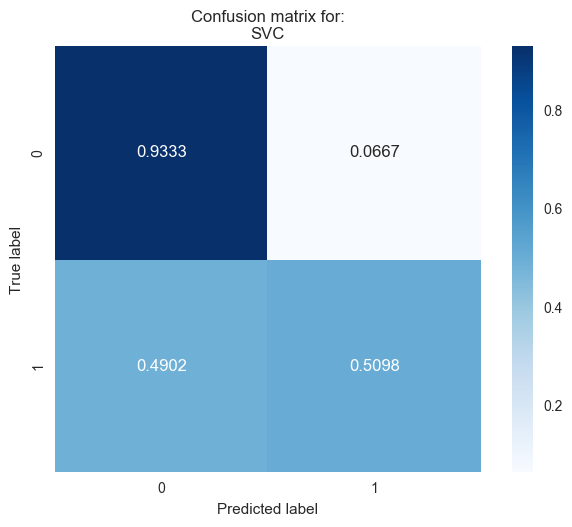

In [34]:
#Reviewer1 added to use confusion matrix using seaborn

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for a model
model = clf_A
cm = confusion_matrix(y_test_50Kp, model.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', square=True, fmt='.4f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

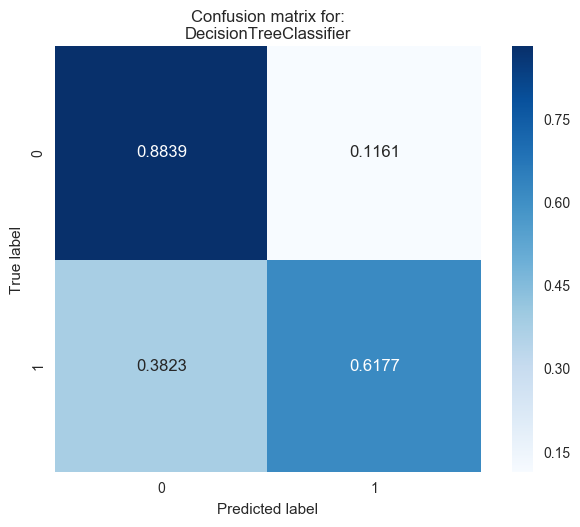

In [35]:
# Compute confusion matrix for a model
model = clf_B
cm = confusion_matrix(y_test_50Kp, model.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', square=True, fmt='.4f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

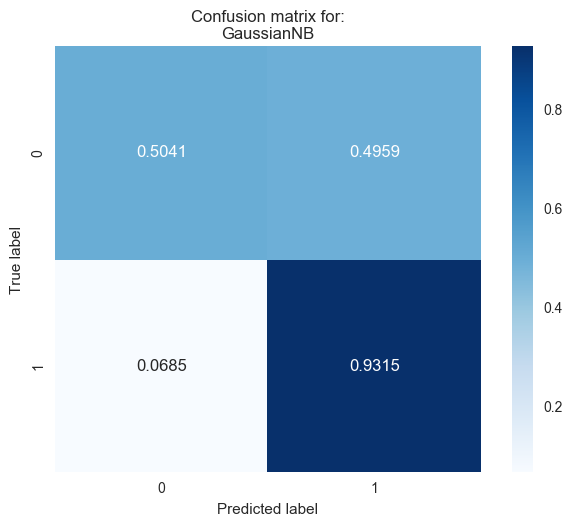

In [36]:
#Reviewer1 added to use confusion matrix using seaborn

# Compute confusion matrix for a model
model = clf_C
cm = confusion_matrix(y_test_50Kp, model.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', square=True, fmt='.4f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

#Reviewer3 suggests to read
#Communicating data science: An interview with a storytelling expert-Tyler Byers
http://blog.kaggle.com/2016/06/13/communicating-data-science-an-interview-with-a-storytelling-expert-tyler-byers/
#Top 10 data mining algorithms in plain English
https://rayli.net/blog/data/top-10-data-mining-algorithms-in-plain-english



**Answer: ** 

SVM tries to find a decision plane to give maximum margin to seperate two catetories in training set, and prediction is made with that decision plane on each test set datapoint whether it falls into <=50K class or >50K class. 

###Reviewer 1 suggests to add 
Make sure the discussion is comprehensive enough for a non-technical audience like CharityML to understand **how the SVM is trained vs how it will make predictions for new potential donors.** For example, you can explicitly mention that our model is trained with census information we have about individuals and their incomes, and then go on to describe how it will predict incomes for new individuals...

1.The SVM takes data about individuals whose census data is known (e.g., age, gender, etc) and uses them to create a function that draws a boundary between individuals with income over and under 50k. The boundary should be drawn so as to maximize the margin between the points at the border of each category. Once boundary is drawn, one side is classified as >50K, the other side as <=50K. 

2.Often, though, it's not easy to draw a decision boundary in low dimensions, so the SVM separates the high & low income individuals by Kernel function that handles non-linearity and tunning parameters (gamma, C) by gridsearch help to seperate out more accrately. Kernel function and hyperparameters determines how much each feature contributes to make the income data point(whether >50K or <=50K).

3.Using this function created with individuals we already know earn over or under 50k, the SVM can look at new potential donors' data and predict the income(whether >50K or <=50K) with the features with determined importance and decision boundary. 

https://www.quora.com/What-does-support-vector-machine-SVM-mean-in-laymans-terms  
http://www.statsoft.com/Textbook/Support-Vector-Machines  
http://blog.aylien.com/support-vector-machines-for-dummies-a-simple/  



### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [44]:
C_range = np.logspace(-3, 3, 13)
gamma_range = np.logspace(-4, 2, 13)
parameters = dict(gamma=gamma_range, C=C_range)

print C_range

[  1.00000000e-03   3.16227766e-03   1.00000000e-02   3.16227766e-02
   1.00000000e-01   3.16227766e-01   1.00000000e+00   3.16227766e+00
   1.00000000e+01   3.16227766e+01   1.00000000e+02   3.16227766e+02
   1.00000000e+03]


In [45]:
print gamma_range

[  1.00000000e-04   3.16227766e-04   1.00000000e-03   3.16227766e-03
   1.00000000e-02   3.16227766e-02   1.00000000e-01   3.16227766e-01
   1.00000000e+00   3.16227766e+00   1.00000000e+01   3.16227766e+01
   1.00000000e+02]


In [46]:
print parameters

{'C': array([  1.00000000e-03,   3.16227766e-03,   1.00000000e-02,
         3.16227766e-02,   1.00000000e-01,   3.16227766e-01,
         1.00000000e+00,   3.16227766e+00,   1.00000000e+01,
         3.16227766e+01,   1.00000000e+02,   3.16227766e+02,
         1.00000000e+03]), 'gamma': array([  1.00000000e-04,   3.16227766e-04,   1.00000000e-03,
         3.16227766e-03,   1.00000000e-02,   3.16227766e-02,
         1.00000000e-01,   3.16227766e-01,   1.00000000e+00,
         3.16227766e+00,   1.00000000e+01,   3.16227766e+01,
         1.00000000e+02])}


#### Reviewer2's note on Hyperparameter gamma and C
- A large C gives you low bias and high variance. Low bias because you penalize the cost of misclassification a lot. A small C gives you higher bias and lower variance.
- A small gamma gives you a pointed bump in the higher dimensions, a large gamma gives you a softer, broader bump. So a small gamma will give you low bias and high variance while a large gamma will give you higher bias and low variance.

In [55]:
C_range = [1e-3, 1, 1e3]
gamma_range = [1e-4, 1e-1, 1e2]
parameters = dict(gamma=gamma_range, C=C_range)

print C_range
print gamma_range
print parameters

[0.001, 1, 1000.0]
[0.0001, 0.1, 100.0]
{'C': [0.001, 1, 1000.0], 'gamma': [0.0001, 0.1, 100.0]}


In [56]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
          
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

# TODO: Initialize the classifier
clf = svm.SVC(random_state=42)

#######################################
#Reviewer1 suggested to add more values of tuning parameters 
#http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
#######################################
#C_range = np.logspace(-3, 3, 13)
#gamma_range = np.logspace(-4, 2, 13)
#parameters = dict(gamma=gamma_range, C=C_range)

# TODO: Create the parameters list you wish to tune
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} #Original answer 

C_range = [1e-3, 1, 1e3]
gamma_range = [1e-4, 1e-1, 1e2]
parameters = dict(gamma=gamma_range, C=C_range)


# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
#grid_obj = GridSearchCV(clf, param_grid={'C': [1, 10]},scoring=scorer) #Original answer 


# Reviewer1: The default grid search uses 3 folds; use the 'cv' param to change this
grid_obj = GridSearchCV(clf, parameters, cv=5,scoring=scorer, n_jobs=-1, pre_dispatch='2*n_jobs')
#If n_jobs=-1, then the number of jobs is set to the number of cores.

#Reviewer2's note: to make sure the labels are evenly split between the validation sets.
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

#from sklearn.cross_validation import StratifiedShuffleSplit
#cv = StratifiedShuffleSplit(y_train_50Kp, ...)
#grid_obj = GridSearchCV(clf, parameters, cv=cv,scoring=scorer, n_jobs=-1, pre_dispatch='2*n_jobs')


# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train_50Kp)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train_50Kp)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test_50Kp, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test_50Kp, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test_50Kp, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test_50Kp, best_predictions, beta = 0.5))


Unoptimized model
------
Accuracy score on testing data: 0.8301
F-score on testing data: 0.6592

Optimized Model
------
Final accuracy score on the testing data: 0.8427
Final F-score on the testing data: 0.6887


In [107]:
#Reviewer3 suggests to look 
print "Best estimator:", best_clf
print "Best parameters:", grid_fit.best_params_


Best estimator: SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
Best parameters: {'C': 1000.0, 'gamma': 0.0001}


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |           0.25         |        0.83           |       0.84          |
| F-score        |            0.29         |      0.66             |   0.69      |




**Answer: **

The optimized scores are sightly better than the unoptimized model. F-score from the optimized model is much better than the naive predictor benchmarks in **Question 1**. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

In [57]:
features_raw.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


**Answer:**

Based on just gut feeling, I would rank the following five features as most important for prediction. 

1.education_level-whether Ph.D vs. high school graduate only makes a significant difference.  
2.occupation-whether English teacher vs. Engineer or medical doctor makes a significant difference.  
3.age-30s might make more money than 20s, 40s would even more, but it would tend to decreases after 50s/60s.   
4.hours-per-week-Working longer hour implies more money is earned.   
5.working class-private sector tends to pay more than state-gov sector.   




### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

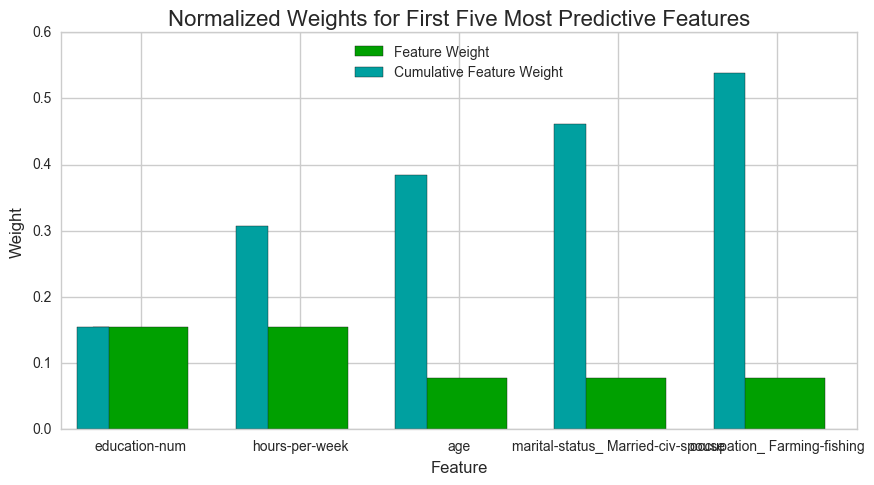

In [58]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set 
clf_featureimportance = AdaBoostClassifier(n_estimators=13)
model = clf_featureimportance.fit(X_train,y_train_50Kp)

# TODO: Extract the feature importances
importances = clf_featureimportance.feature_importances_ 

# Plot
vs.feature_plot(importances, X_train, y_train_50Kp)



{'f0': 6, 'f1': 22, 'f2': 39, 'f3': 7, 'f4': 3, 'f30': 13, 'f38': 1}


<type 'dict'>


f0      6
f1     22
f2     39
f3      7
f30    13
f38     1
f4      3
dtype: int64


<class 'pandas.core.series.Series'>


f2     39
f1     22
f30    13
f3      7
f0      6
f4      3
f38     1
dtype: int64


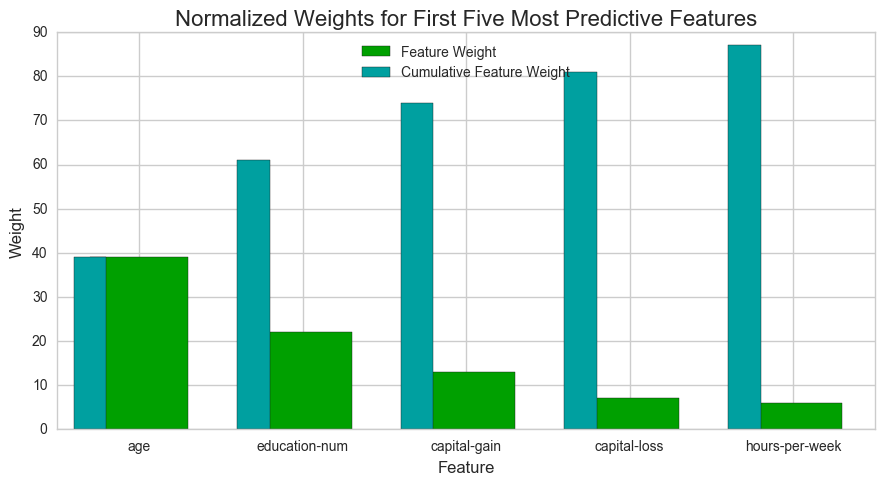

'\n'

In [102]:
#Reviewer3 suggests to look xgboost:tree-based ensemble method gradient boosting
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting

import xgboost as xgb
from xgboost import XGBClassifier

clf_featureimportanceXGB = xgb.XGBClassifier(n_estimators=13)
model = clf_featureimportanceXGB.fit(X_train,y_train_50Kp)
#importances = clf_featureimportanceXGB.feature_importances_ 

print clf_featureimportanceXGB.booster()
print '\n'
print clf_featureimportanceXGB.booster().get_fscore()
print '\n'
print type(clf_featureimportanceXGB.booster().get_fscore())
print '\n'
print pd.Series(clf_featureimportanceXGB.booster().get_fscore())#.sort_values()
print '\n'
print type(pd.Series(clf_featureimportanceXGB.booster().get_fscore()))
print '\n'
print pd.Series(clf_featureimportanceXGB.booster().get_fscore()).sort_values(ascending=False)



importances = pd.Series(clf_featureimportanceXGB.booster().get_fscore()).sort_values(ascending=False)
vs.feature_plot(importances, X_train, y_train_50Kp)

'''
'''

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

education-num: Number of educational years completed

My initial thought was ranked in the following order:   

1.education_level-whether Ph.D vs. high school graduate only makes a significant difference.  
2.occupation-whether English teacher vs. Engineer or medical doctor makes a significant difference.  
3.age-30s might make more money than 20s, 40s would even more, but it would tend to decreases after 50s/60s.  
4.hours-per-week-Working longer hour implies more money is earned.  
5.working class-private sector tends to pay more than state-gov sector.  

And the actual feature importance was in this order:   

1.education-num  
2.hours-per-week  
3.age  
4.marital-status_Married  
5.Occupation_Farming-fishing  

and they are very different. Maybe distribution of education_level is not broad enough to fit to the model, while education_num is more quantitative metric to fit to the model. Hours-per-week and martal_status_married may be more relevent than I assumed, since longer hours per week may directly indicate how much money is earned. Married status may imply they have more oblication to make more money to maintain the marriage than just single status. Occupation_farming_fishing is not clear why that is a good indicator of income. 

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [59]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train_50Kp)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test_50Kp, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test_50Kp, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test_50Kp, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test_50Kp, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8427
F-score on testing data: 0.6887

Final Model trained on reduced data
------
Accuracy on testing data: 0.8196
F-score on testing data: 0.6316


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

There is not much of difference in terms of Accuracy and F-Score between full set of features and reduced set of features, while training time was significantly shorter. I would chose reduced data as training set if the training data is very large to handle. 


####  Reviewer1 added comment: Feature reduction is a great way to fight the curse of dimentionality.
https://en.wikipedia.org/wiki/Curse_of_dimensionality

#### Reviewer1 added recursive feature elimination (RFE) and selectKBest

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile    (Reviewer2 added)

And additional reading on feature selection techniques:

http://machinelearningmastery.com/feature-selection-machine-learning-python/






> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.